In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Evolution of the maximum Mach number in the F4 run

In [2]:
import utils
from ppm import *
import sys
sys.path.insert(0, '/rpod2/home/andrassy/notebooks/lib/lcse')
import rprofile as rprofile

import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

yprof = yprofile('/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4')
rp_set = rprofile.rprofile_set('/rpod2/PPM/RProfiles/AGBTP_M2.0Z1.e-5/F4/')

cb = utils.colourblind

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0


In [3]:
dumps = range(1, 1960, 1)
nd = len(dumps)
t = np.zeros(nd)
Ma_max = np.zeros(nd)

for i in range(nd):
    rp = rp_set.get_dump(dumps[i])
    t[i] = yprof.get('t', fname = dumps[i] - 1, resolution = 'l')[-1]
    Ma_max[i] = np.max(rp.get_table('mach')[2, :, 0])

<IPython.core.display.Javascript object>


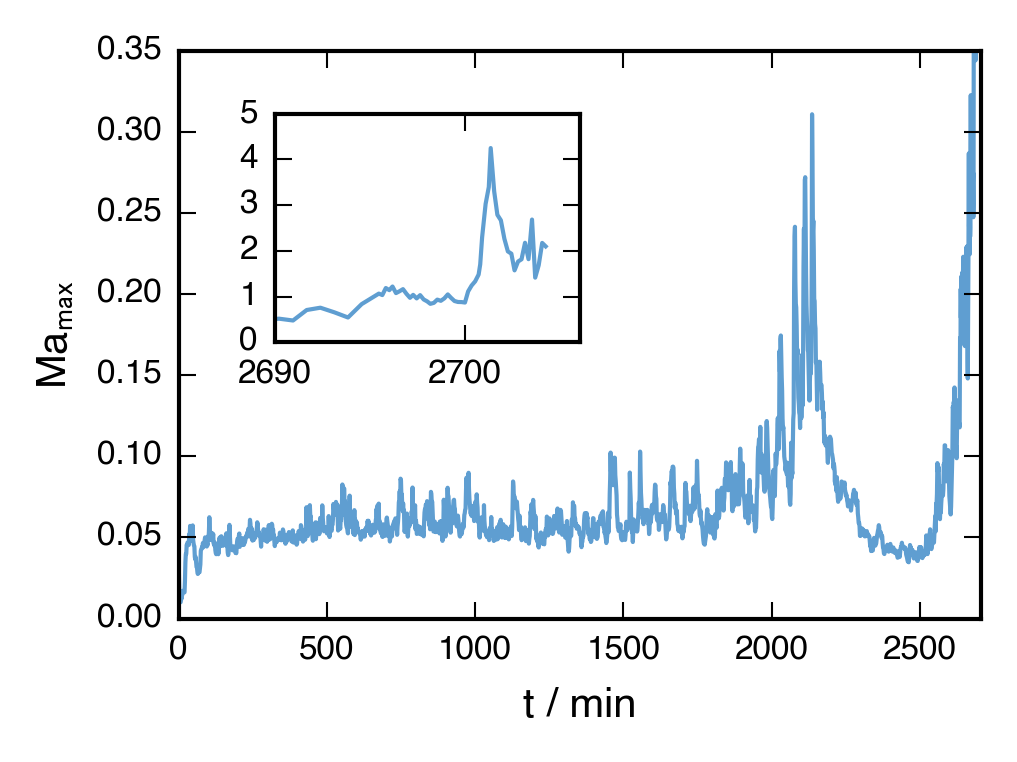

In [9]:
ifig = 1; plt.close(ifig); fig = plt.figure(ifig)
ax1 = fig.add_subplot(111)
ax1.plot(t/60., Ma_max, color=cb(3))
ax1.set_xlim((0., 2706.))
ax1.set_ylim((0., 0.35))
ax1.set_xlabel('t / min')
ax1.set_ylabel(r'Ma$_\mathrm{max}$')

left, bottom, width, height = [0.27, 0.55, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(t/60., Ma_max, color=cb(3))
ax2.set_xlim((2690., 2706.))
ax2.set_ylim((0., 5.))
ax2.set_xticks(np.arange(2690., 2710., 10.))
ax2.set_yticks(np.arange(0., 6., 1.))

fig.tight_layout()
fig.savefig('Ma_max_evolution_F4.pdf')